# Clients Cluster

## Dowloand the data from : https://www.kaggle.com/arjunbhasin2013/ccdata

In [1]:
#Import libraries that are needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
#Data analysis
creditcard_df = pd.read_csv('Marketing_data.csv')

In [3]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
creditcard_df.shape

(8950, 18)

In [5]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [13]:
#Who makes the most purchases?
creditcard_df[creditcard_df['ONEOFF_PURCHASES']==40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [15]:
#Who makes the most cash advacements?
print(creditcard_df['CASH_ADVANCE'].max())
creditcard_df[creditcard_df['CASH_ADVANCE']==47137.211760]


47137.21176


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


<AxesSubplot:>

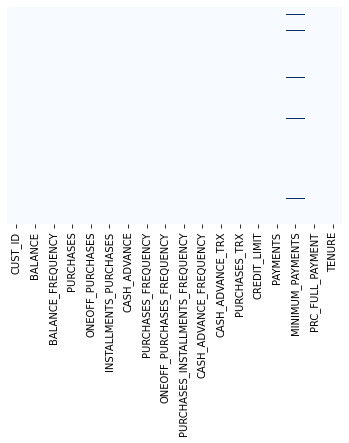

In [20]:
#Visualize the data
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [21]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [24]:
#We can replace those missing values with the mean of the column
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull()==True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [25]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [26]:
#We can replace those missing values with the mean of the column
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull()==True), 'CREDIT_LIMIT'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

<AxesSubplot:>

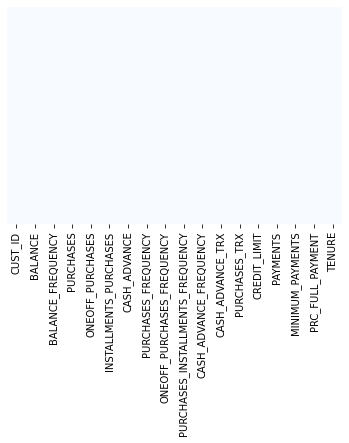

In [27]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [28]:
#Is there duplication in the data?
creditcard_df.duplicated().sum()

0

In [29]:
#We can drop CUST_ID because it is not useful
creditcard_df.drop(['CUST_ID'], axis = 1, inplace = True)

In [30]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

c:\Users\Encin\Dropbox\My PC (LAPTOP-QC4SVF2M)\Desktop\Github\Projectos para Github\16- Classification models (RRHH Project)\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Encin\Dropbox\My PC (LAPTOP-QC4SVF2M)\Desktop\Github\Projectos para Github\16- Classification models (RRHH Project)\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Encin\Dropbox\My PC (LAPTOP-QC4SVF2M)\Desktop\Github\Projectos para Git

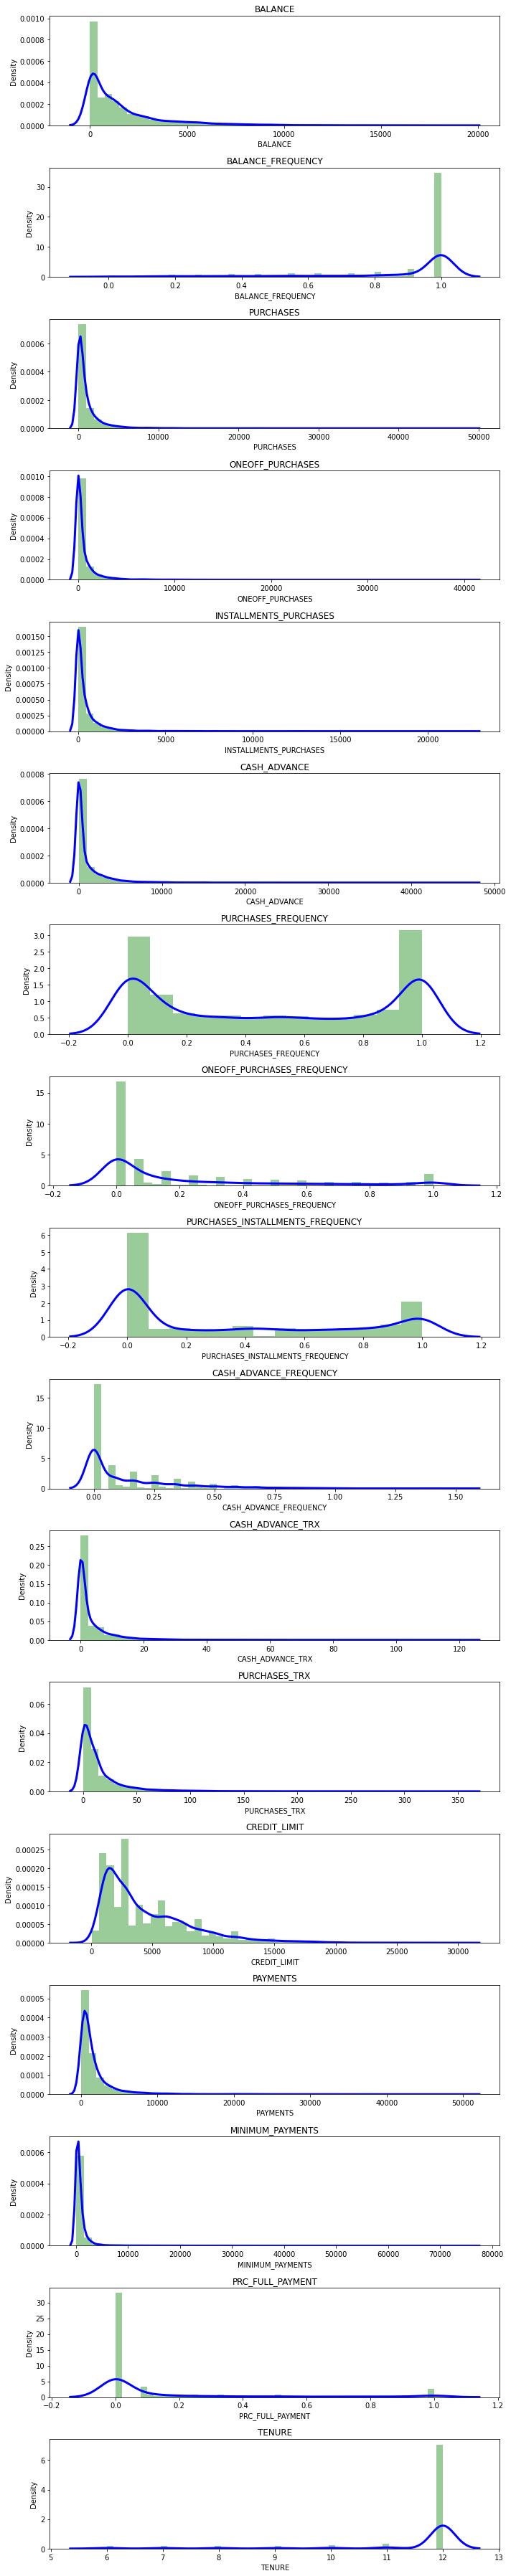

In [31]:
plt.figure(figsize = (10,50))
for i in range (len(creditcard_df.columns)):
    plt.subplot(len(creditcard_df.columns), 1, i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]],kde_kws = {'color':'b','lw':3,'label':'KDE'},  hist_kws = {'color':'g'})
    plt.title(creditcard_df.columns[i])

plt.tight_layout()

In [32]:
#Correlations
corr = creditcard_df.corr()


<AxesSubplot:>

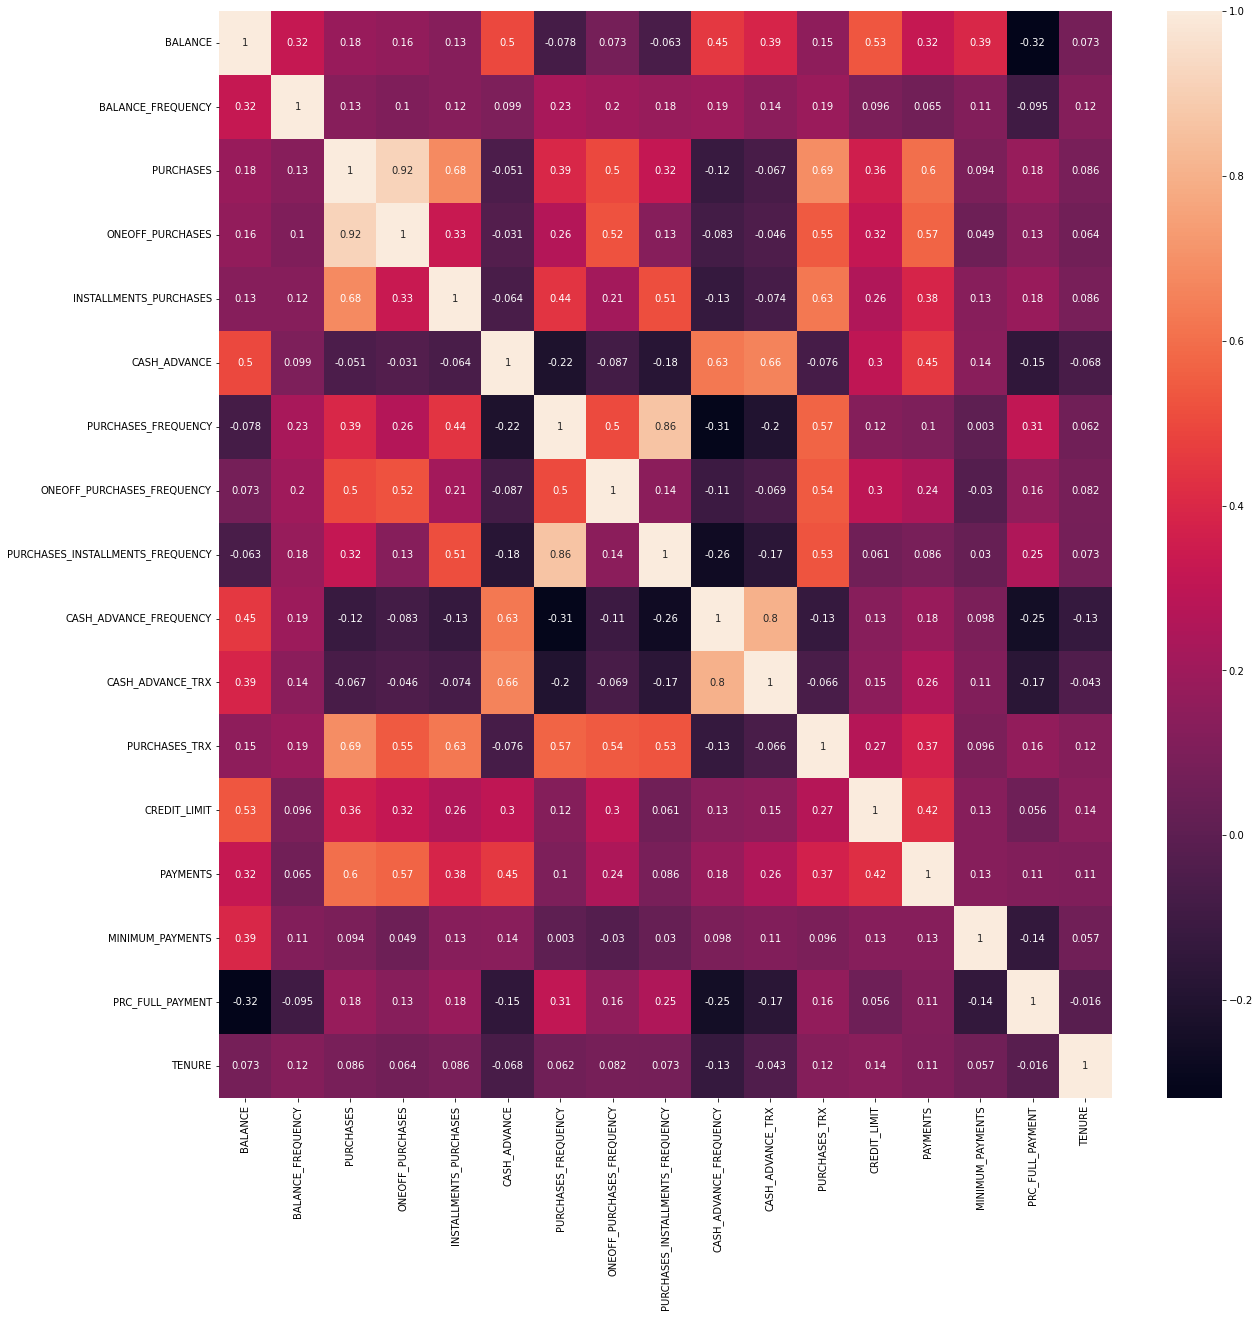

In [33]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot = True)

In [34]:
#Scaling dataset
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)


In [35]:
creditcard_df_scaled.shape

(8950, 17)

In [36]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

Text(0, 0.5, 'WCSS')

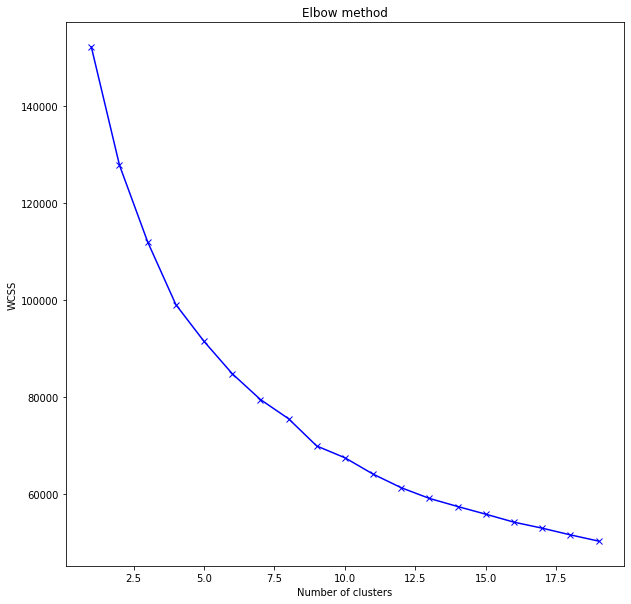

In [37]:
#Find the K value for K-means clustering with elbow method
scores_1 = []

range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters =i, random_state = 0)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_) #WCSS

plt.figure(figsize = (10,10))
plt.plot(range_values, scores_1, 'bx-')
plt.xlabel('Number of clusters')
plt.title('Elbow method')
plt.ylabel('WCSS')
plt.show()

In [38]:
#We define k = 8
kmeans = KMeans(n_clusters = 8, random_state = 0)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_


In [39]:
labels

array([0, 3, 5, ..., 7, 7, 7])

In [41]:
kmeans.cluster_centers_.shape

(8, 17)

In [45]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])

cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.026256,0.402351,-0.362670,-0.242012,-0.412781,-0.076063,-0.893616,-0.403997,-0.793039,0.136703,-0.008035,-0.493912,-0.291316,-0.244001,-0.004572,-0.453148,0.270674
1,0.764239,0.472814,2.062716,1.730076,1.698851,-0.211460,1.154694,1.735392,1.074662,-0.308501,-0.226207,2.436974,1.164128,1.137954,0.330154,0.215231,0.316885
2,-0.689835,0.137606,0.145095,0.012721,0.319235,-0.448972,0.914685,0.369082,0.735900,-0.643116,-0.458479,0.239867,0.143096,-0.106374,-0.292184,2.164495,0.189287
3,1.687924,0.392391,-0.211900,-0.144746,-0.235166,2.055274,-0.460285,-0.168533,-0.422776,1.944477,1.972431,-0.259008,1.031017,0.843892,0.544704,-0.390435,0.063903
4,-0.699832,-2.199888,-0.322797,-0.242849,-0.316951,-0.314584,-0.580570,-0.458343,-0.452526,-0.512164,-0.369379,-0.428460,-0.197488,-0.208295,-0.253704,0.113443,0.195591
5,-0.155194,0.398456,0.039853,-0.049341,0.184797,-0.323143,0.925542,0.251249,0.831140,-0.390756,-0.313542,0.246228,-0.175429,-0.160683,0.009950,-0.336576,0.289367
6,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044006,8.098975,1.120318,1.110132,0.310863
7,-0.332825,-0.344129,-0.287118,-0.205018,-0.301852,0.072498,-0.196537,-0.269970,-0.234654,0.313908,0.002881,-0.385982,-0.564865,-0.392199,-0.205867,-0.035486,-3.194122


In [46]:
#Inverse transform the cluster centers to get the original values
cluster_centers= scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1619.123952,0.972584,228.355756,190.746949,37.794503,819.363160,0.131699,0.081938,0.049263,0.162500,3.193996,2.433021,3434.058787,1026.786227,853.551007,0.021177,11.879550
1,3155.174538,0.989276,5410.228755,3464.009963,1947.317692,535.429711,0.953785,0.720159,0.791535,0.073410,1.705128,75.283883,8729.853480,5027.410361,1633.615922,0.216666,11.941392
2,128.640758,0.909868,1313.203376,613.551093,699.747653,37.355824,0.857458,0.312562,0.656903,0.006450,0.120043,20.672026,5014.715483,1425.202238,183.285042,0.786792,11.770632
3,5077.746080,0.970224,550.477423,352.188014,198.409586,5288.876382,0.305616,0.152181,0.196415,0.524254,16.709220,8.271868,8245.513647,4176.128554,2133.617084,0.039519,11.602837
4,107.833093,0.356138,313.544857,189.357639,124.452692,319.174683,0.257340,0.065725,0.184592,0.032655,0.728086,4.059928,3775.460147,1130.151571,272.960088,0.186895,11.779070
5,1241.451179,0.971661,1088.350749,510.541068,578.176941,301.224652,0.861815,0.277410,0.694754,0.056950,1.109132,20.830137,3855.727365,1267.982090,887.393646,0.055272,11.904566
6,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
7,871.727207,0.795750,389.773601,252.149727,138.106190,1130.903517,0.411471,0.121920,0.271180,0.197960,3.268489,5.115756,2438.720589,597.766825,384.441450,0.143336,7.242765


In [47]:
labels.shape

(8950,)

In [49]:
labels.min(), labels.max()

(0, 7)

In [50]:
#Concat original data with labels
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([0, 3, 5, ..., 7, 7, 7])

In [51]:
credidcat_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
credidcat_df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,7
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,7
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,7
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,7


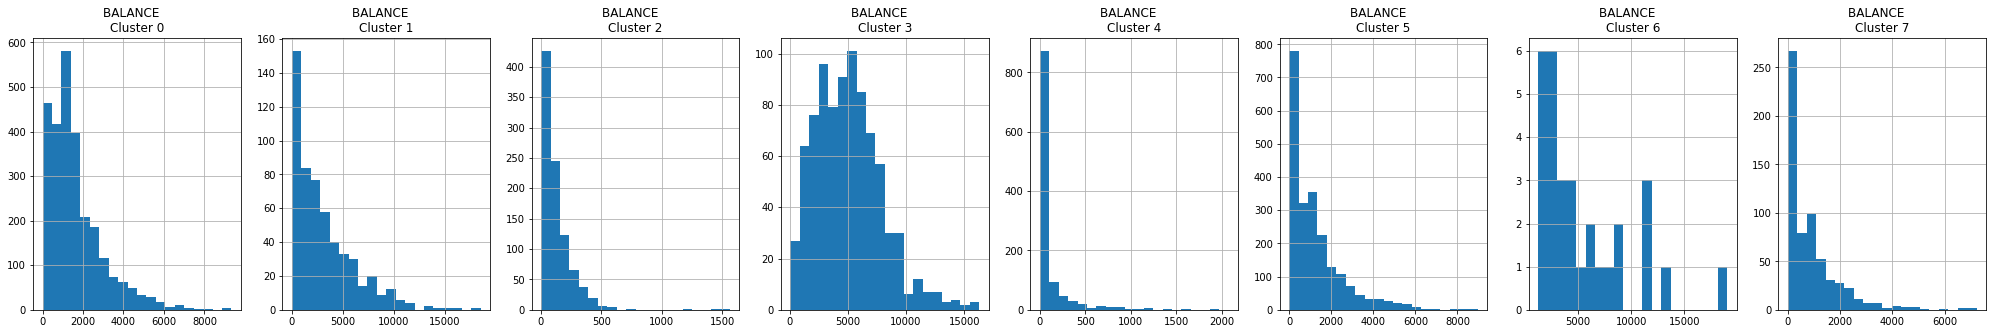

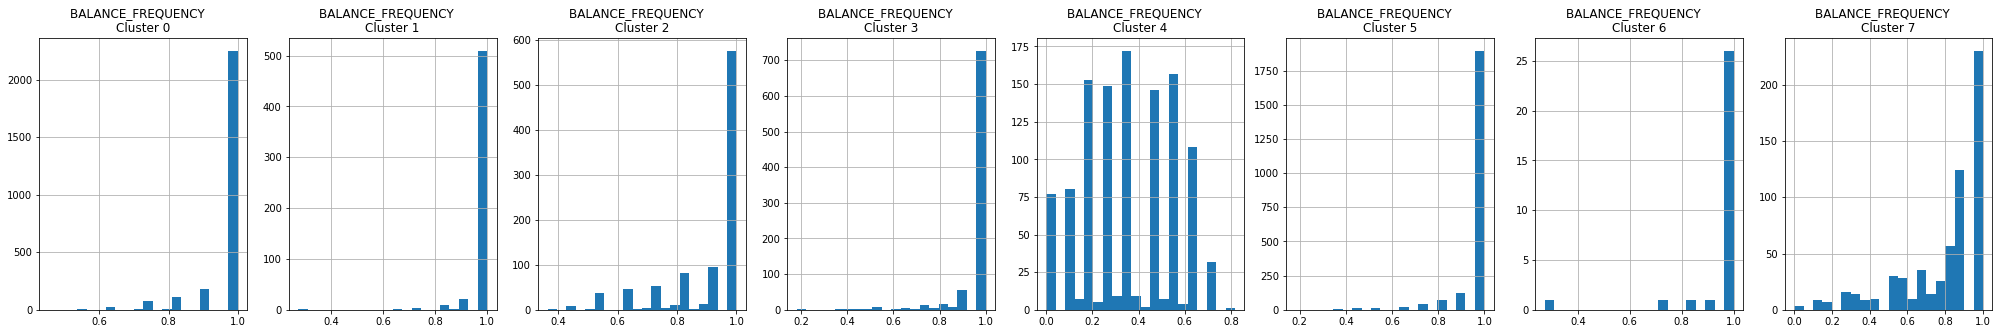

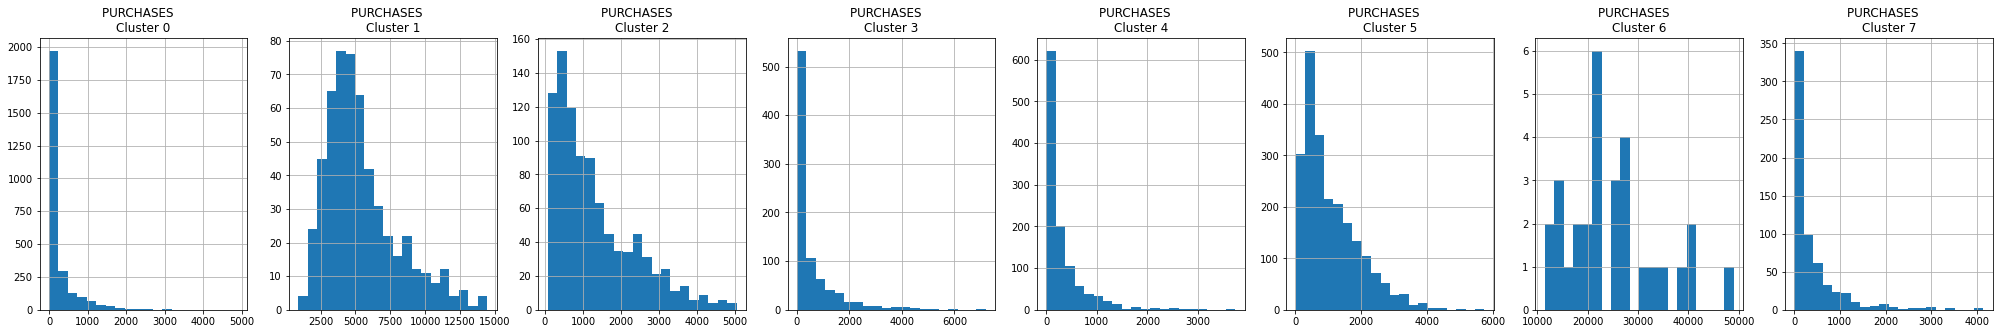

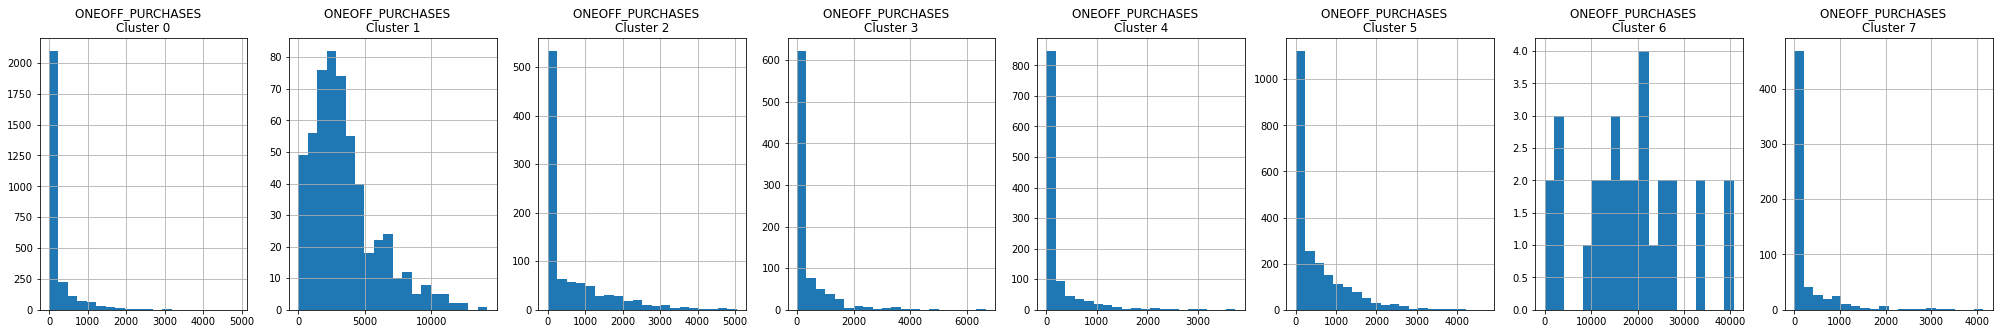

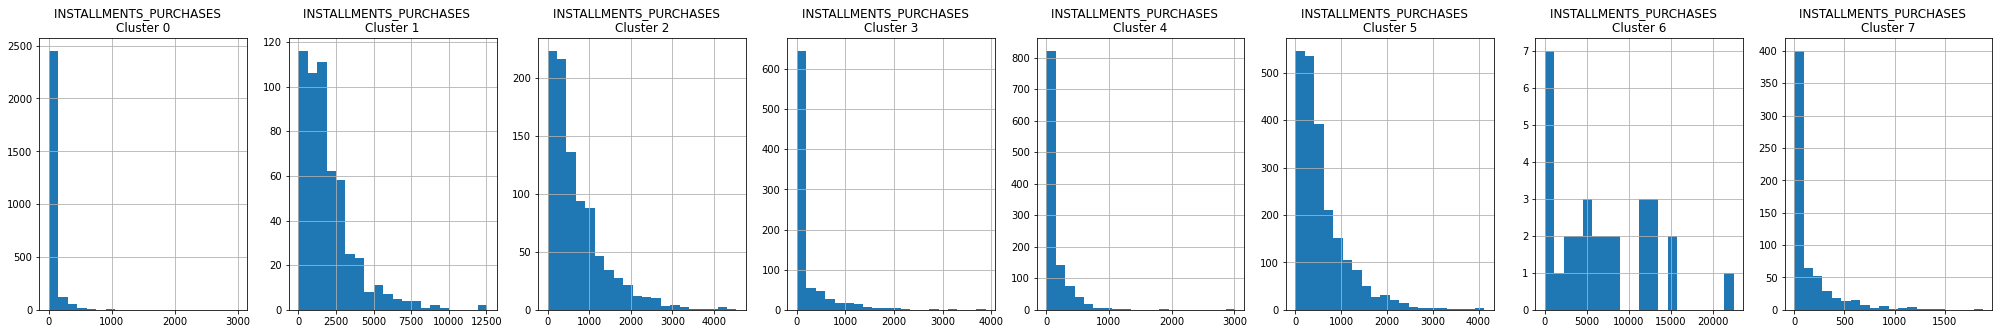

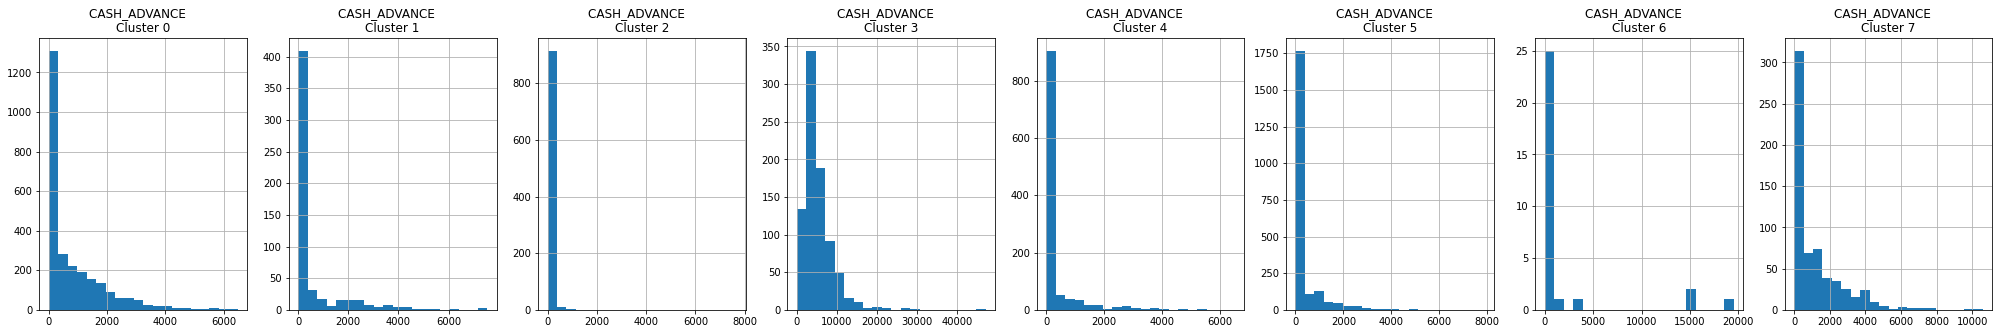

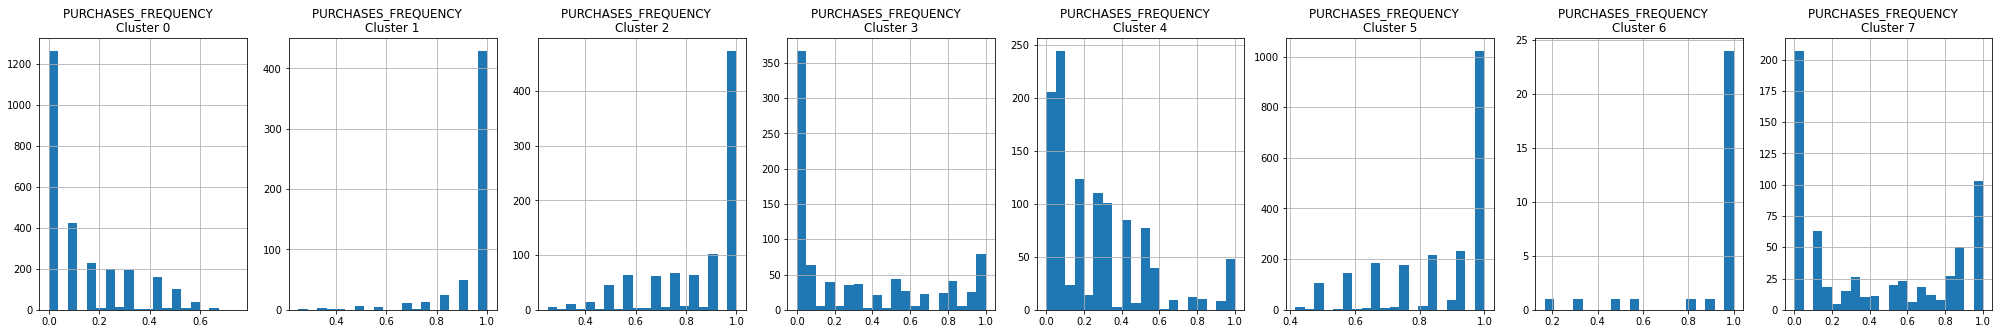

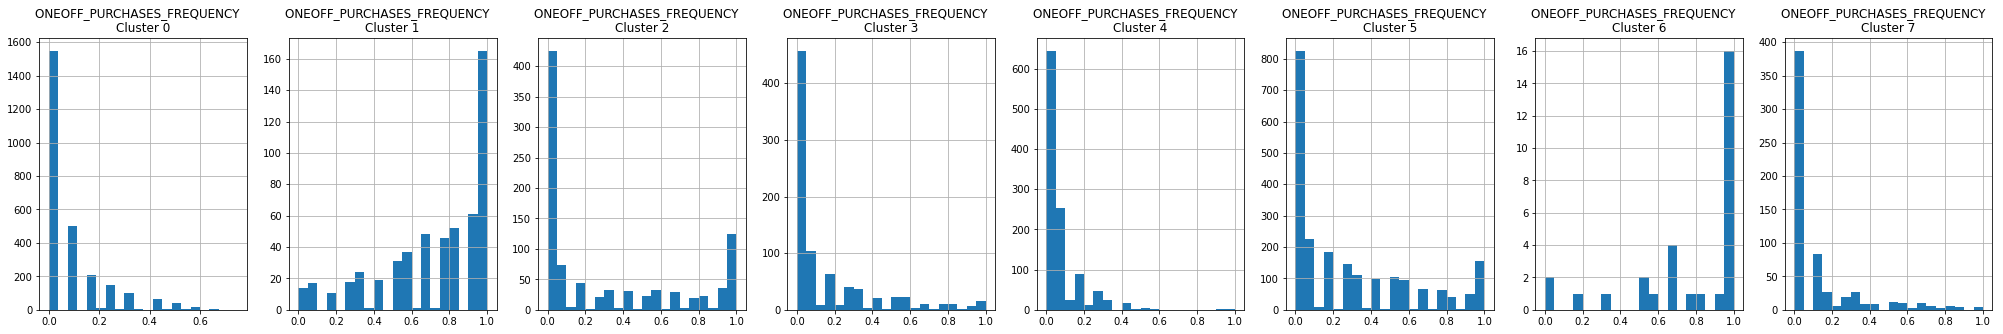

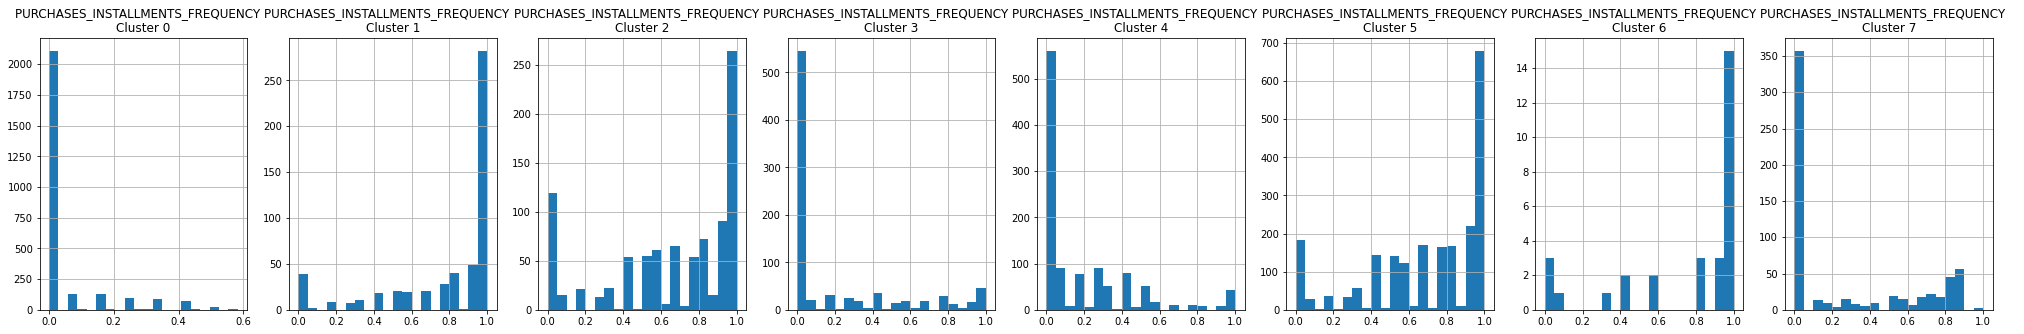

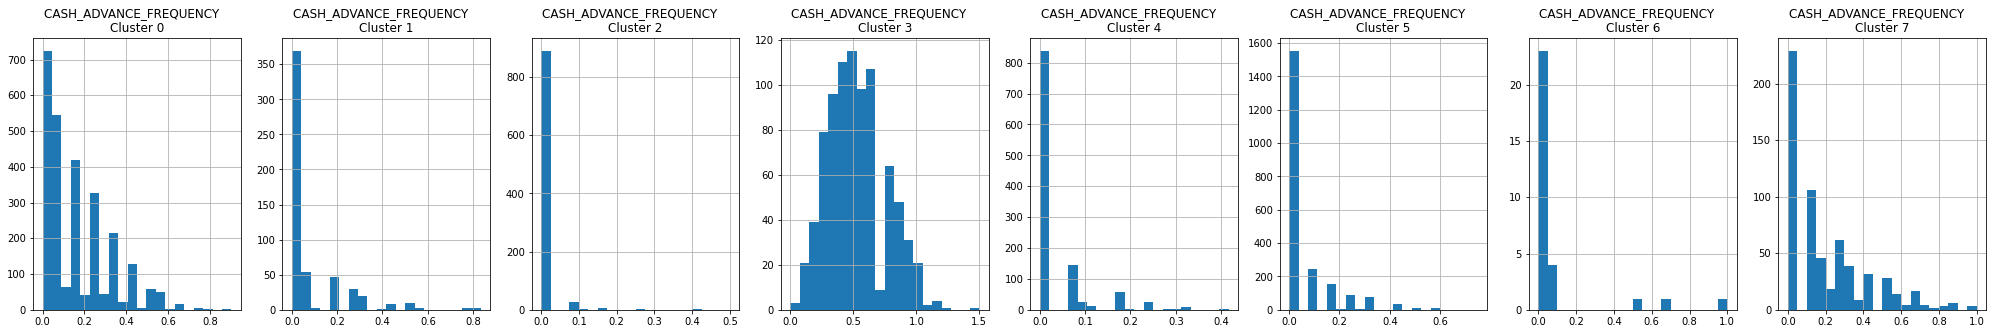

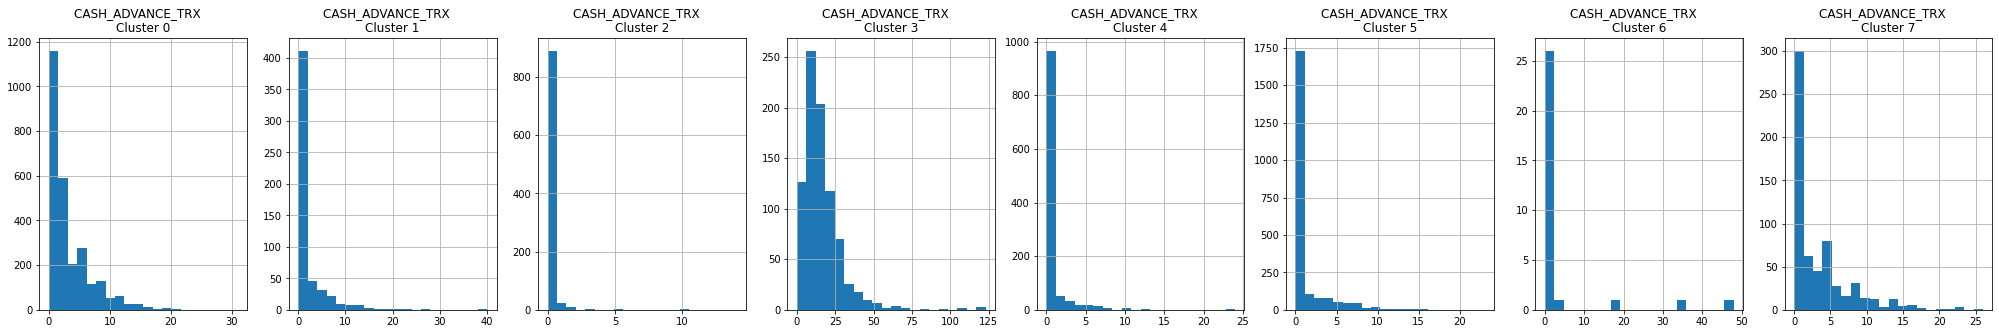

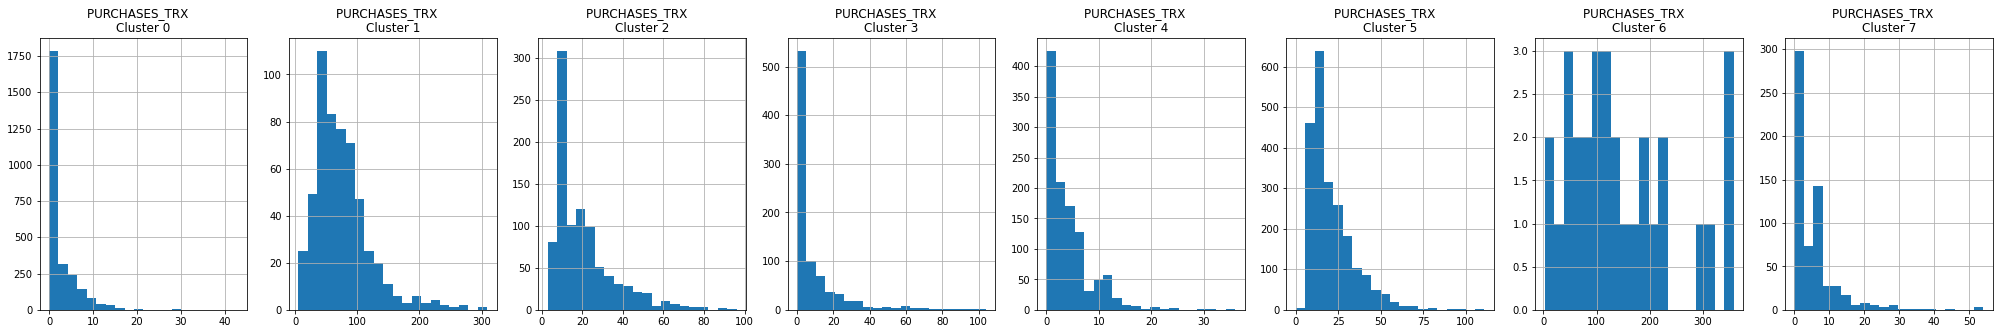

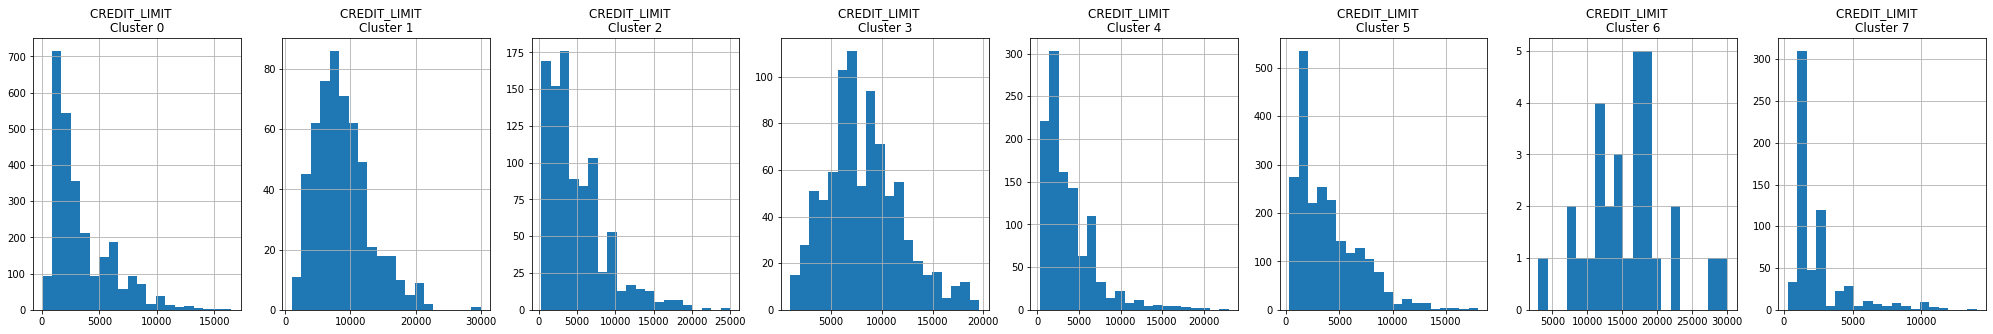

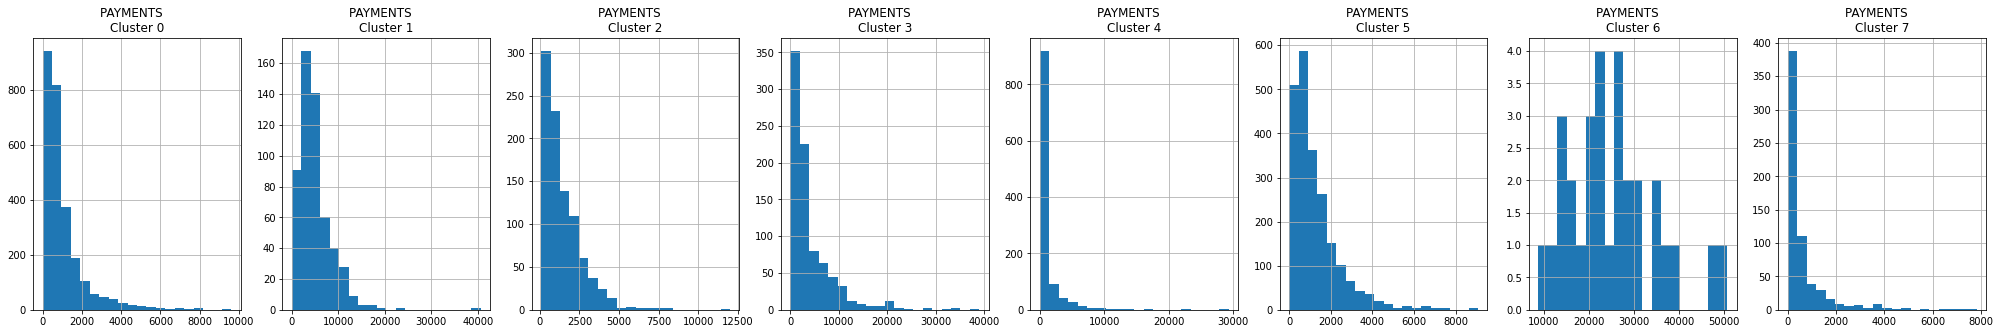

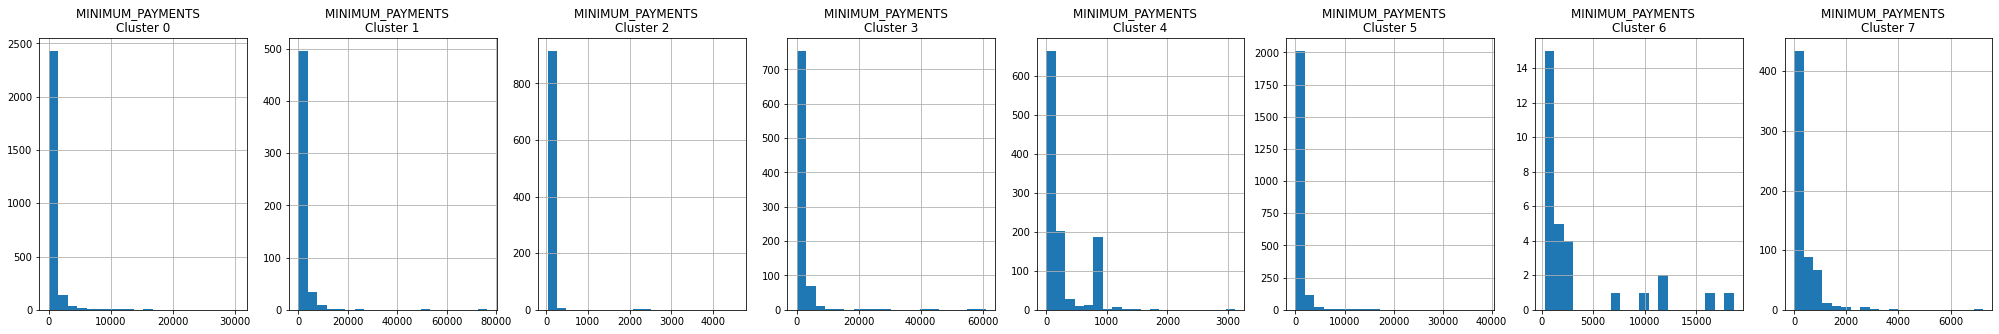

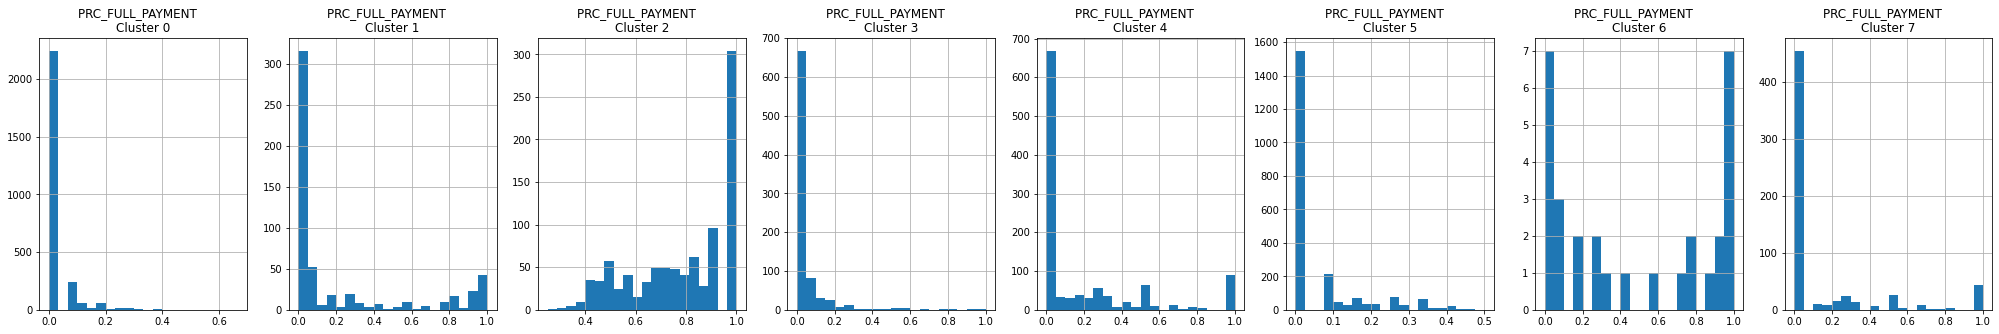

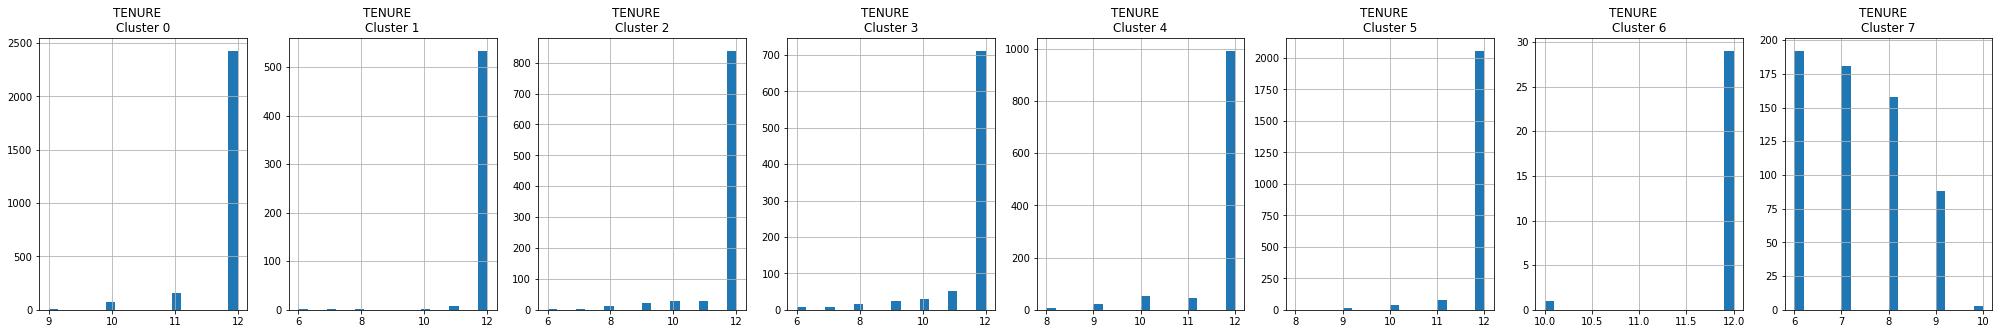

In [53]:
#Histogram of the clusters
for i in creditcard_df.columns:
    plt.figure(figsize = (35,5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster = credidcat_df_cluster[credidcat_df_cluster['cluster']==j]
        cluster[i].hist(bins = 20)
        plt.title('{}   \nCluster {}'.format(i,j))
    plt.show()